In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

    patient_id  treatment_start  treatment_end  ctDNA_measurement_time  \
10          11         0.617535     179.164108               56.077631   
42          43         1.031656     293.071095               74.752366   
29          30         1.393512      96.733576               75.967257   
6            7         1.742508      88.732721               66.934463   
32          33         1.951548     162.875445               40.787883   

   ctDNA_status    dfs_status treatment  relapse_time  
10     negative  disease-free         B           NaN  
42     high VAF    recurrence         C     88.022626  
29     negative  disease-free         B           NaN  
6       low VAF  disease-free         C           NaN  
32     high VAF  disease-free         A           NaN  


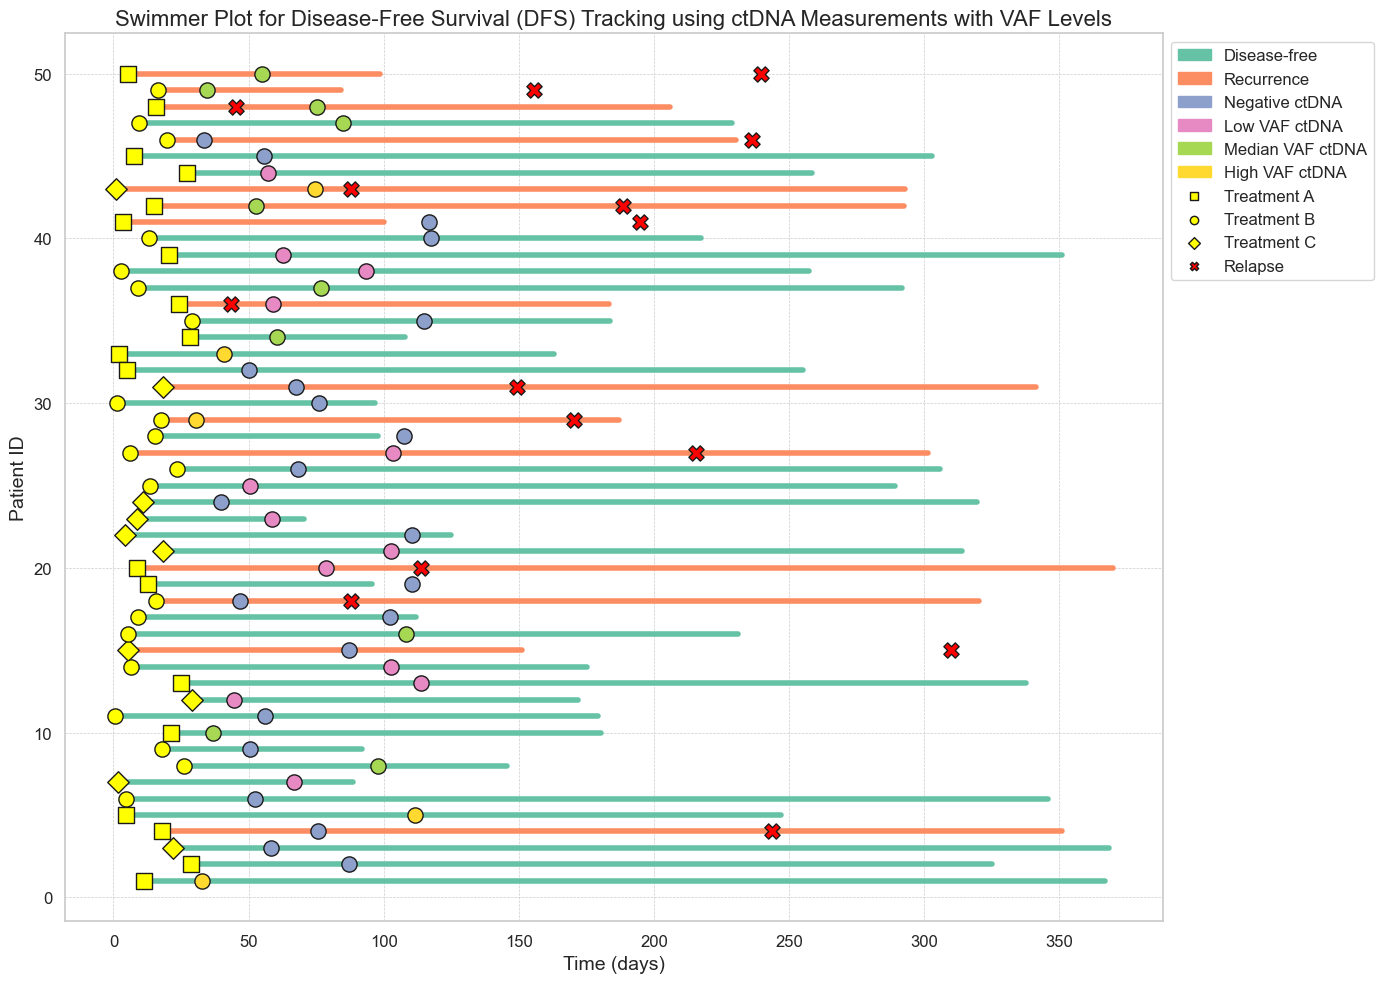

In [9]:
np.random.seed(42)

# Define number of patients
num_patients = 50

# Generate synthetic data
data = {
    'patient_id': np.arange(1, num_patients + 1),
    'treatment_start': np.random.uniform(0, 30, num_patients),
    'treatment_end': np.random.uniform(60, 365, num_patients),
    'ctDNA_measurement_time': np.random.uniform(30, 120, num_patients),
    'ctDNA_status': np.random.choice(['negative', 'low VAF', 'median VAF', 'high VAF'], num_patients, p=[0.5, 0.2, 0.2, 0.1]),
    'dfs_status': np.random.choice(['disease-free', 'recurrence'], num_patients, p=[0.7, 0.3]),
    'treatment': np.random.choice(['A', 'B', 'C'], num_patients, p=[0.4, 0.4, 0.2]),
    'relapse_time': np.random.uniform(30, 365, num_patients)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Ensure treatment_start is less than treatment_end
df['treatment_end'] = df['treatment_start'] + df['treatment_end']
df['relapse_time'] = np.where(df['dfs_status'] == 'recurrence', df['relapse_time'], np.nan)

# Sort by treatment_start
df = df.sort_values(by='treatment_start')

# Display the DataFrame
print(df.head())

# Plotting the swimmer plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create a color palette for DFS status
palette_dfs = {'disease-free': '#66c2a5', 'recurrence': '#fc8d62'}

# Create a color palette for ctDNA status
palette_ctDNA = {'negative': '#8da0cb', 'low VAF': '#e78ac3', 'median VAF': '#a6d854', 'high VAF': '#ffd92f'}

# Create a shape dictionary for treatments
shape_dict = {'A': 's', 'B': 'o', 'C': 'D'}

# Plotting
for i, row in df.iterrows():
    plt.plot([row['treatment_start'], row['treatment_end']], [row['patient_id'], row['patient_id']], color=palette_dfs[row['dfs_status']], lw=4)
    plt.scatter(row['ctDNA_measurement_time'], row['patient_id'], color=palette_ctDNA[row['ctDNA_status']], s=120, edgecolor='k', zorder=5)
    if not np.isnan(row['relapse_time']):
        plt.scatter(row['relapse_time'], row['patient_id'], color='red', marker='X', s=120, edgecolor='k', zorder=6)
    plt.scatter(row['treatment_start'], row['patient_id'], color='yellow', marker=shape_dict[row['treatment']], s=120, edgecolor='k', zorder=7)

# Customizing the plot
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Patient ID', fontsize=14)
plt.title('Swimmer Plot for Disease-Free Survival (DFS) Tracking using ctDNA Measurements with VAF Levels', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a legend
handles = [
    mpatches.Patch(color='#66c2a5', label='Disease-free'),
    mpatches.Patch(color='#fc8d62', label='Recurrence'),
    mpatches.Patch(color='#8da0cb', label='Negative ctDNA'),
    mpatches.Patch(color='#e78ac3', label='Low VAF ctDNA'),
    mpatches.Patch(color='#a6d854', label='Median VAF ctDNA'),
    mpatches.Patch(color='#ffd92f', label='High VAF ctDNA'),
    plt.scatter([], [], color='yellow', marker='s', label='Treatment A', edgecolor='k'),
    plt.scatter([], [], color='yellow', marker='o', label='Treatment B', edgecolor='k'),
    plt.scatter([], [], color='yellow', marker='D', label='Treatment C', edgecolor='k'),
    plt.scatter([], [], color='red', marker='X', label='Relapse', edgecolor='k')
]

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

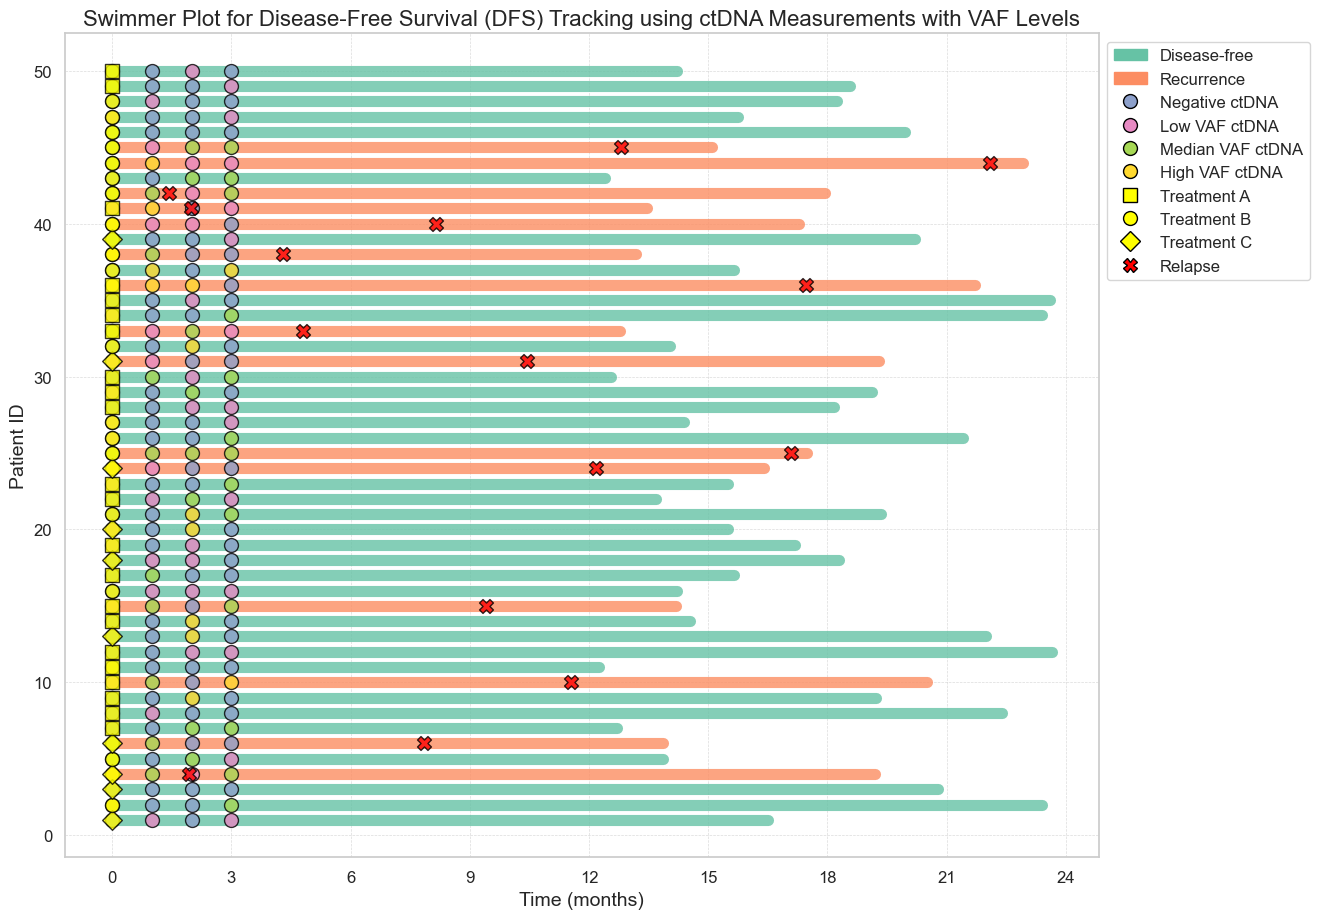

In [14]:
np.random.seed(42)

# Define number of patients
num_patients = 50

# Generate synthetic data
data = {
    'patient_id': np.arange(1, num_patients + 1),
    'treatment_start': np.zeros(num_patients),  # All treatments start at 0
    'treatment_end': np.random.uniform(12, 24, num_patients),  # Duration in months
    'dfs_status': 'disease-free',  # Default to disease-free, will adjust later
    'treatment': np.random.choice(['A', 'B', 'C'], num_patients, p=[0.4, 0.4, 0.2]),
    'relapse_time': np.nan  # Initialize as NaN, will adjust later
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate ctDNA measurement times and statuses
measurement_times = np.array([0, 1, 2, 3])  # in months
ctDNA_status = ['negative', 'low VAF', 'median VAF', 'high VAF']

# Create a DataFrame to hold all measurement times and statuses
measurements = pd.DataFrame({
    'patient_id': np.repeat(df['patient_id'], len(measurement_times)),
    'measurement_time': np.tile(measurement_times, num_patients),
    'ctDNA_status': np.random.choice(ctDNA_status, num_patients * len(measurement_times), p=[0.5, 0.2, 0.2, 0.1])
})

# Ensure relapse only in patients with ctDNA before treatment and at 4 weeks
for pid in df['patient_id']:
    patient_measurements = measurements[measurements['patient_id'] == pid]
    if (patient_measurements.loc[patient_measurements['measurement_time'] == 0, 'ctDNA_status'].values[0] != 'negative' and
            patient_measurements.loc[patient_measurements['measurement_time'] == 1, 'ctDNA_status'].values[0] != 'negative'):
        # Assign recurrence and relapse time
        df.loc[df['patient_id'] == pid, 'dfs_status'] = 'recurrence'
        df.loc[df['patient_id'] == pid, 'relapse_time'] = np.random.uniform(1, df.loc[df['patient_id'] == pid, 'treatment_end'].values[0])

# Sort by patient_id and measurement_time
measurements = measurements.sort_values(by=['patient_id', 'measurement_time'])

# Plotting the swimmer plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create a color palette for DFS status
palette_dfs = {'disease-free': '#66c2a5', 'recurrence': '#fc8d62'}

# Create a color palette for ctDNA status
palette_ctDNA = {'negative': '#8da0cb', 'low VAF': '#e78ac3', 'median VAF': '#a6d854', 'high VAF': '#ffd92f'}

# Create a shape dictionary for treatments
shape_dict = {'A': 's', 'B': 'o', 'C': 'D'}

# Increase the line width further for better visibility
for i, row in df.iterrows():
    plt.plot([row['treatment_start'], row['treatment_end']], [row['patient_id'], row['patient_id']], color=palette_dfs[row['dfs_status']], lw=8, alpha=0.8)  # Change the lw value to increase thickness
    patient_measurements = measurements[measurements['patient_id'] == row['patient_id']]
    for _, meas_row in patient_measurements.iterrows():
        plt.scatter(meas_row['measurement_time'], meas_row['patient_id'], color=palette_ctDNA[meas_row['ctDNA_status']], s=100, edgecolor='black', zorder=5, alpha=0.8)
    if not np.isnan(row['relapse_time']):
        plt.scatter(row['relapse_time'], row['patient_id'], color='red', marker='X', s=100, edgecolor='black', zorder=6, alpha=0.8)
    plt.scatter(row['treatment_start'], row['patient_id'], color='yellow', marker=shape_dict[row['treatment']], s=100, edgecolor='black', zorder=7, alpha=0.8)

# Customizing the plot
plt.xlabel('Time (months)', fontsize=14)
plt.ylabel('Patient ID', fontsize=14)
plt.title('Swimmer Plot for Disease-Free Survival (DFS) Tracking using ctDNA Measurements with VAF Levels', fontsize=16)
plt.xticks(np.arange(0, 25, step=3), fontsize=12)  # Set x-axis ticks to be every 3 months up to 24 months
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Create a legend
handles = [
    mpatches.Patch(color='#66c2a5', label='Disease-free'),
    mpatches.Patch(color='#fc8d62', label='Recurrence'),
    plt.Line2D([0], [0], marker='o', color='w', label='Negative ctDNA', markerfacecolor='#8da0cb', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Low VAF ctDNA', markerfacecolor='#e78ac3', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Median VAF ctDNA', markerfacecolor='#a6d854', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='High VAF ctDNA', markerfacecolor='#ffd92f', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='s', color='w', label='Treatment A', markerfacecolor='yellow', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Treatment B', markerfacecolor='yellow', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='D', color='w', label='Treatment C', markerfacecolor='yellow', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='X', color='w', label='Relapse', markerfacecolor='red', markersize=10, markeredgecolor='black')
]

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout(pad=3.0)  # Add padding to the plot

# Display the plot
plt.show()

In [15]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 46.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 70.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 41.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=3e2b1ce96faa6e09cd8320bb17100bb5c2167a4fdb362a0dc05ea63d2047ade2
  Stored in directory: /Users/nick/Library/Caches/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d224